In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
img_height=256
img_width=256
batch_size=32

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q keras

In [ ]:
train_path='/content/drive/MyDrive/Covid-19/Covid19-dataset/train'
test_path='/content/drive/MyDrive/Covid-19/Covid19-dataset/test'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 263 files belonging to 3 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 68 files belonging to 3 classes.


In [ ]:
class_names= train_ds.class_names
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


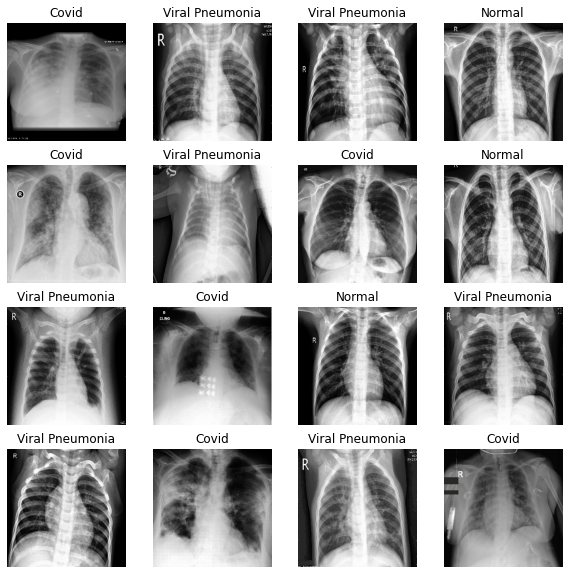

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())


(32, 256, 256, 3)
[1 1 0 2 0 1 0 2 2 2 2 1 2 0 0 0 0 0 0 2 1 1 0 0 2 1 2 0 0 0 0 0]


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes=3
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/10
9/9 [==============================] - 21s 2s/step - loss: 2.7994 - accuracy: 0.3764 - val_loss: 1.0806 - val_accuracy: 0.4853
Epoch 2/10
9/9 [==============================] - 16s 2s/step - loss: 1.0450 - accuracy: 0.6008 - val_loss: 0.9385 - val_accuracy: 0.7206
Epoch 3/10
9/9 [==============================] - 16s 2s/step - loss: 0.8077 - accuracy: 0.7034 - val_loss: 0.8917 - val_accuracy: 0.5735
Epoch 4/10
9/9 [==============================] - 16s 2s/step - loss: 0.6048 - accuracy: 0.7643 - val_loss: 0.5832 - val_accuracy: 0.7500
Epoch 5/10
9/9 [==============================] - 16s 2s/step - loss: 0.4890 - accuracy: 0.7909 - val_loss: 0.6174 - val_accuracy: 0.6912
Epoch 6/10
9/9 [==============================] - 16s 2s/step - loss: 0.4946 - accuracy: 0.7947 - val_loss: 0.8065 - val_accuracy: 0.6324
Epoch 7/10
9/9 [==============================] - 16s 2s/step - loss: 0.4224 - accuracy: 0.8289 - val_loss: 0.5672 - val_accuracy: 0.7206
Epoch 8/10
9/9 [==================

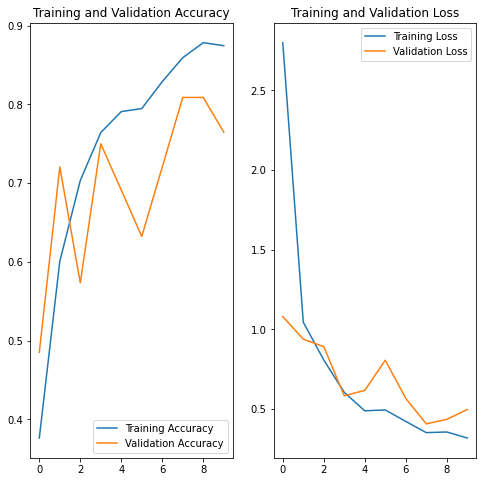

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path='/content/covid pred1.jpeg'
img=image.load_img(path)
img=image.img_to_array(img)/255
img.shape()

NameError: ignored

In [ ]:
Normal_url='https://cdn.w600.comps.canstockphoto.com/chest-x-ray-normal-pictures_csp87625789.jpg'
Normal_path = tf.keras.utils.get_file('Normal', origin=Normal_url)

img = keras.preprocessing.image.load_img(
    Normal_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

65536/56111 [===================================] - 0s 0us/step
This image most likely belongs to Normal with a 73.41 percent confidence.


In [ ]:
Covi_url='https://www.verywellhealth.com/thmb/_SLlVDAG2dhYSAddVST5q3WnQPo=/2386x1835/filters:no_upscale():max_bytes(150000):strip_icc()/covid-19-pneumonia-12-20adbdbe7ee54f7784689c3b1ede2d1c.jpg'
Covi_path = tf.keras.utils.get_file('Covid_19', origin=Covi_url)

img = keras.preprocessing.image.load_img(
    Covi_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


155648/147265 [===============================] - 0s 0us/step
This image most likely belongs to Covid with a 99.80 percent confidence.


In [ ]:
VP2_url='https://media-us.amboss.com/media/thumbs/big_5b2127a64799f.jpg'
VP2_path = tf.keras.utils.get_file('Viral', origin=VP2_url)

img = keras.preprocessing.image.load_img(
    VP2_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to Normal with a 92.92 percent confidence.


In [ ]:
Pnuemonia_url='https://scx2.b-cdn.net/gfx/news/2015/pneumonia.jpg'
Pnuemonia_path = tf.keras.utils.get_file('Pnuemonia', origin=Pnuemonia_url)

img = keras.preprocessing.image.load_img(
    Pnuemonia_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

32768/23804 [=========================================] - 0s 0us/step
This image most likely belongs to Covid with a 99.75 percent confidence.


In [ ]:

Pnuemoviral_url='https://image.shutterstock.com/z/stock-photo-chest-x-ray-showing-diffuse-widespread-ground-glass-recticulonodular-opacities-both-lungs-due-to-1667308786.jpg'
Pnuemoviral_path = tf.keras.utils.get_file('Pnuemonia_viral', origin=Pnuemoviral_url)

img = keras.preprocessing.image.load_img(
    Pnuemoviral_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

802816/787448 [==============================] - 0s 0us/step
This image most likely belongs to Viral Pneumonia with a 98.34 percent confidence.
